# Question_1
1) 
      (a) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.<br>
      (b) Implement Logistic regression using the data provided (Logistic_regression_ls.csv) and plot the decision boundary (linear).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# (a)

In [3]:
#Defining the sigmoid function
def h(z):
    return 1/(1+np.exp(-z))

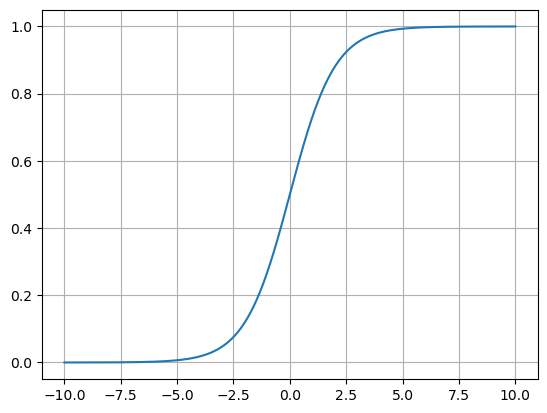

In [4]:
#plotting the sigmoid function
z=np.linspace(-10,10,1000)
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(z,h(z))
ax.grid()

The reason behind using the sigmoid function is that it is derived from probability and maximum likelihood. While the other functions may work very similarly, they will lack this probabilistic theory background.

# (b)

In [5]:
df=pd.read_csv(r'C:\\Users\\MANOJ PATEL\\Downloads\\Logistic_regression_ls.csv')

In [6]:
df

,x1,x2,label
0,7.395,7.638,1
1,4.987,6.485,1
2,5.358,6.499,1
3,2.036,2.380,0
4,5.956,7.378,1
...,...,...,...
495,0.304,1.608,0
496,6.140,4.261,1
497,6.579,6.231,1
498,2.555,0.446,0


In [7]:
x_1=df['x1']
x_2=df['x2']
y=df['label']


In [8]:
#defining the obejective function
def j(w):
    sum=0
    for i in range(len(y)):
        x_i=w[0]+w[1]*x_1[i]+w[2]*x_2[i]
        sum+=(h(x_i)-y[i])**2
    return sum/(2*len(y))
        

In [9]:
#defining the cost function
def cross_entropy(w,x,b):
    if b==1:
        return -np.log(h(w[0]+w[1]*x[0]+w[2]*x[1]))
    else:
        return -np.log(1-h(w[0]+w[1]*x[0]+w[2]*x[1]))
def cost_fun(w):
    cost=0
    for i in range(len(y)):
        cost+=cross_entropy(w,[x_1[i],x_2[i]],y[i])
    return cost/len(y)
def grad_cost_fun(w):
    gradc=[]
    for i in range(3):
        sum=0
        x_0=[1 for i in range(len(y))]
        features=[x_0,x_1,x_2]
        for j in range(len(y)):
            sum+=(h(w[0]+w[1]*x_1[j]+w[2]*x_2[j])-y[j])*features[i][j]
        gradc.append(sum/len(y))
    return np.array(gradc)

In [10]:
def SteepestDescent(f,gradf,initialGuess=np.array([0,0,0]),iterations=2000,tolerance=10**-5,StepL=0.3):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        w_0=w_0+StepL*p
        k=k+1
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)

In [11]:
w,value=SteepestDescent(cost_fun,grad_cost_fun)

minimum value will be: 0.019297879555561732 at [-10.3738448    1.36228185   1.33178355] Number of iterations: 2000


In [12]:
# here is  the model
def predict(x):
    val=w[0]+w[1]*x[0]+w[2]*x[1]
    if val>=0:
        return 1
    else:
        return 0

In [13]:
#decision line
def line(x):
    return (-w[0]-w[1]*x)/w[2]

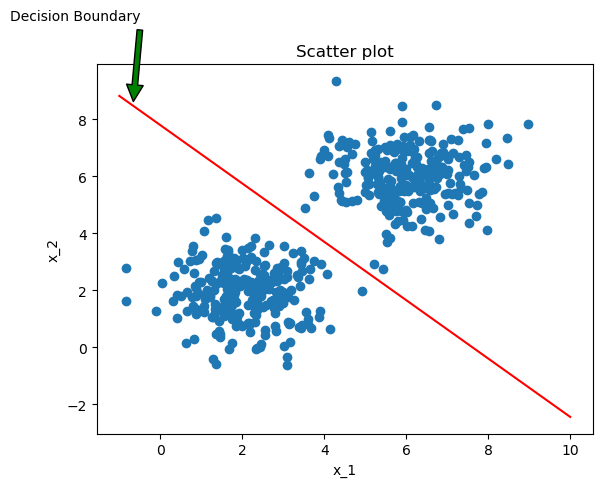

In [14]:
x=np.linspace(-1,10,100)
plt.scatter(x_1,x_2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter plot')
plt.plot(x,line(x),color='red')
plt.annotate('Decision Boundary', xy=(x[3],line(x[3])), xytext=(x[3]-3, line(x[3])+3),
            arrowprops=dict(facecolor='green',shrink=0.05))
plt.show()